## Customer Segmentation

Using K means Clustering algorithm


In [842]:
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt;
from sklearn.preprocessing import StandardScaler;
from sklearn.cluster import KMeans;
from sklearn.metrics import silhouette_score;


## Data Collection

In [843]:
df=pd.read_csv('./Mall_Customers.csv')

In [844]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [845]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [846]:
df.shape

(200, 5)

In [847]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [848]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [849]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [850]:
X=df.iloc[:,3:5]

In [851]:
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


#### Choosing the correct number of cluster

In [852]:
wcss=[]

for i in range(1,11):
    km=KMeans(n_clusters=i,init='k-means++',max_iter=100,algorithm='lloyd')
    km.fit(X)
    wcss.append(km.inertia_)
    


## Analysis  Graph For cluster value

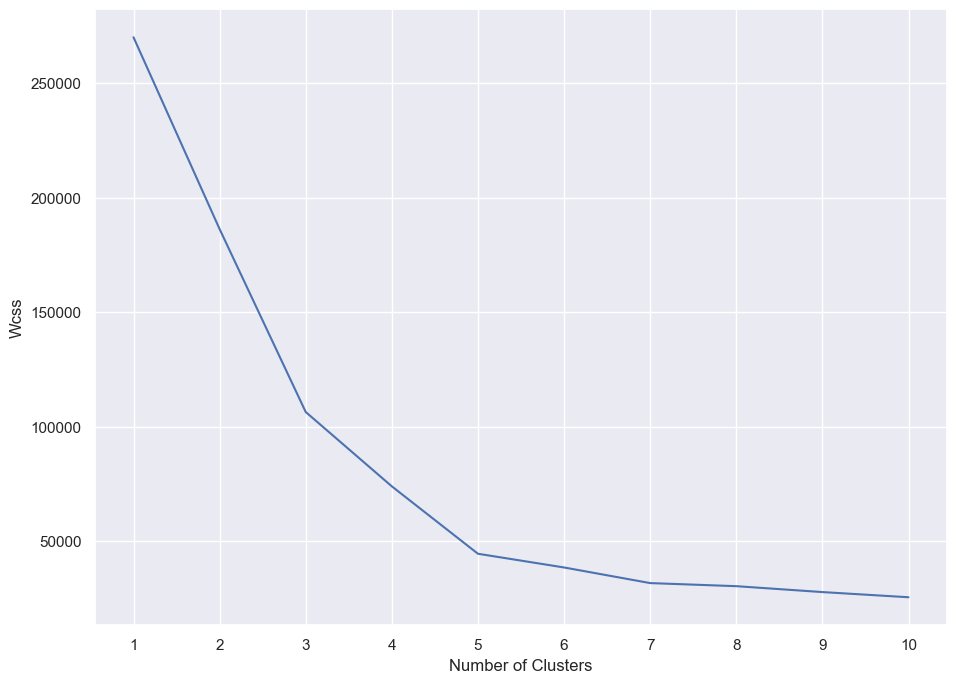

In [853]:
plt.figure(figsize=(11,8))
plt.xticks(range(1,11))
plt.plot(range(1,11),wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('Wcss')
plt.show()

OPTIMUM NUMBER OF CLUSTERS = 5

### TRAIN MODEL USING NO. OF CLUSTER AS 5

In [854]:
kmeans=KMeans(n_clusters=5,init='k-means++')

In [855]:
y_pred=kmeans.fit_predict(X)

#### Predicted values

In [856]:
y_pred

array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 2, 4, 1, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 1, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4])

### Finding Out the Centroids

Of Each Cluster

In [857]:
centroids = kmeans.cluster_centers_  


## Visualizing the Output

In [858]:
X.columns

Index(['Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

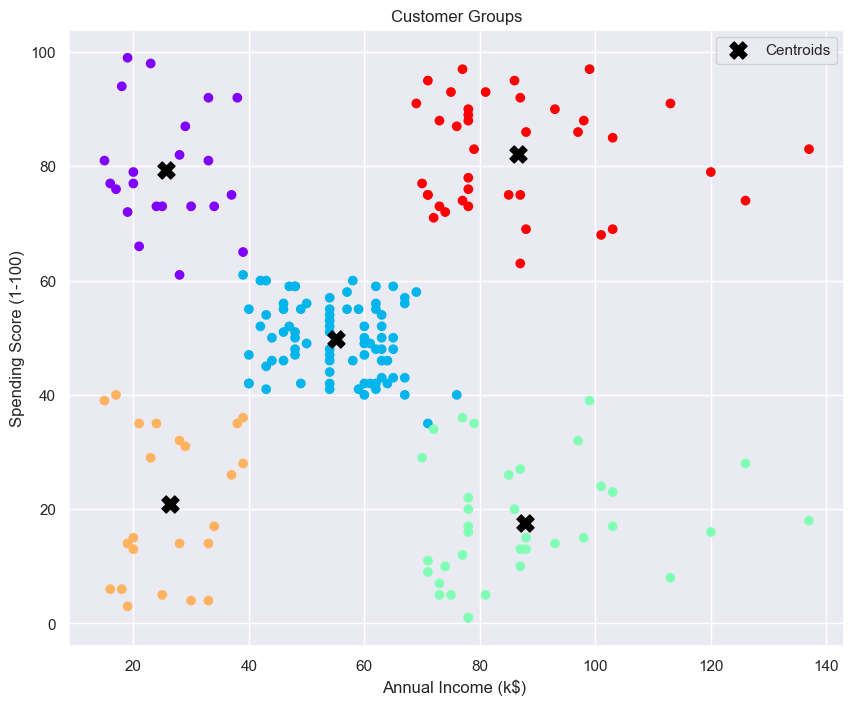

In [859]:
plt.figure(figsize=(10,8))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y_pred,cmap='rainbow')
plt.xlabel('Annual Income (k$) ')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Groups')
plt.scatter(centroids[:, 0], centroids[:, 1], 
            s=150, c='black', marker='X', label='Centroids')
plt.legend()
plt.show()

In [860]:
sc=silhouette_score(X,y_pred)
print(sc)

0.5532176107575425


In [864]:
sil_core=[]
for i in range(2, 11):
    km=KMeans(n_clusters=i,init='k-means++')
    lables=km.fit_predict(X)
    score=silhouette_score(X,lables)
    sil_core.append(score)

Text(0.5, 1.0, 'Customer Groups')

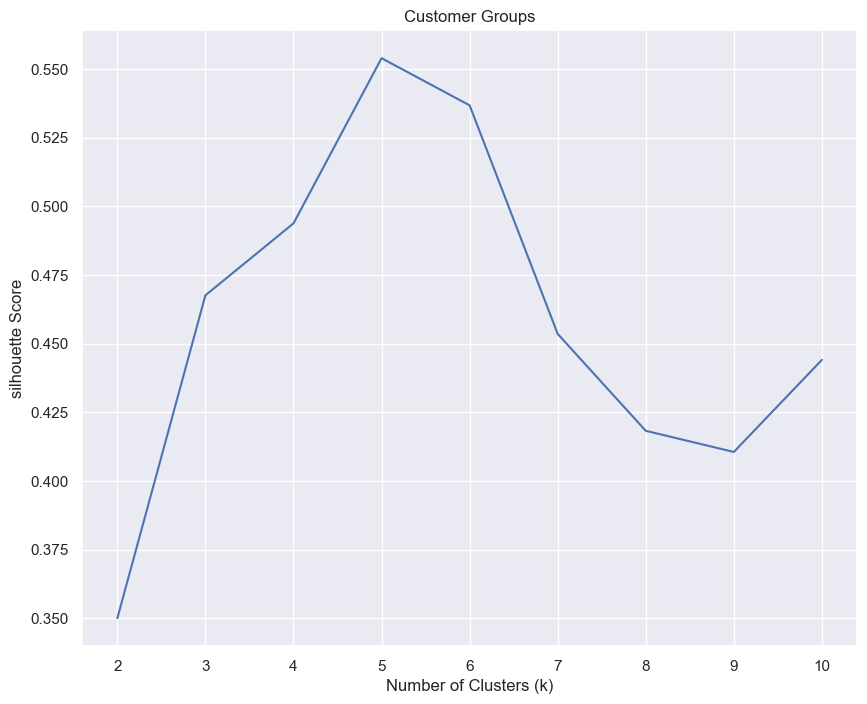

In [862]:
plt.figure(figsize=(10,8))
plt.plot(range(2,11),sil_core)
plt.xticks(range(2,11))
plt.xlabel('Number of Clusters (k)')
plt.ylabel('silhouette Score')
plt.title('Customer Groups')

## Concluding number of clusters = 5